In [1]:
import cv2
import numpy as np
import vart
import os
import pathlib
import xir
import threading
import time
import sys
import argparse
%matplotlib inline

In [2]:
def load_test_images(path):
    import torch
    import torchvision
    import torchvision.transforms as transforms

    test_transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784))])

    test_ds = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=test_transform)
    
    imgs = dict()
    
    imgs['data'] = test_ds.data
    imgs['labels'] = test_ds.targets
    
    return imgs
            
def run_inference(threads, model):
    import subprocess
    def run_command(command):
        subp = subprocess.Popen(command,shell=True,stdout=subprocess.PIPE,stderr=subprocess.PIPE,encoding="utf-8")
        subp.wait()
        if subp.poll() == 0:
            print(subp.communicate()[0])
        else:
            print("Failed to execute the command")
    cmd = f'sh ./inference.sh {threads} {model}'
    run_command(cmd)
    
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def visualize(imgs):
    import matplotlib.pyplot as plt
    X = imgs['data']
    Y = imgs['labels']
    label_names = load_label_names()
    
    fig, axes1 = plt.subplots(3,3,figsize=(10,10))
    i = 0
    for j in range(3):
        for k in range(3):
            axes1[j][k].set_axis_off()
            axes1[j][k].set_title(label_names[Y[i:i+1][0]])
            axes1[j][k].imshow(X[i:i+1][0])
            i += 1

Files already downloaded and verified


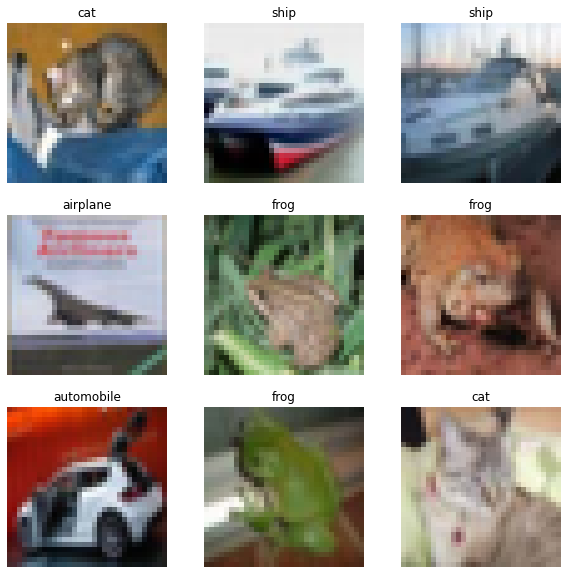

In [3]:
IMG_PATH = './data/cifar-10-batches-py/test_batch'
MODEL_PATH = 'CifarResNet_int_u50.xmodel'
imgs = load_test_images(IMG_PATH)
visualize(imgs)

In [9]:
def default_run_inference(repeat=0):
    for i in range(repeat):
        run_inference(threads=1, model='CifarResNet_int_u50.xmodel')
    
default_run_inference(repeat=10)

# of threads: 1
model: CifarResNet_int_u50.xmodel
Pre-processing 10000 images...
Starting 1 threads...
---------------------------
Throughput=8102.24 fps, total frames = 10000, time=1.2342 seconds
Correct:9048, Wrong:952, Accuracy:0.9048
---------------------------

# of threads: 1
model: CifarResNet_int_u50.xmodel
Pre-processing 10000 images...
Starting 1 threads...
---------------------------
Throughput=8216.10 fps, total frames = 10000, time=1.2171 seconds
Correct:9048, Wrong:952, Accuracy:0.9048
---------------------------

# of threads: 1
model: CifarResNet_int_u50.xmodel
Pre-processing 10000 images...
Starting 1 threads...
---------------------------
Throughput=8185.78 fps, total frames = 10000, time=1.2216 seconds
Correct:9048, Wrong:952, Accuracy:0.9048
---------------------------

# of threads: 1
model: CifarResNet_int_u50.xmodel
Pre-processing 10000 images...
Starting 1 threads...
---------------------------
Throughput=8086.23 fps, total frames = 10000, time=1.2367 seconds
Co

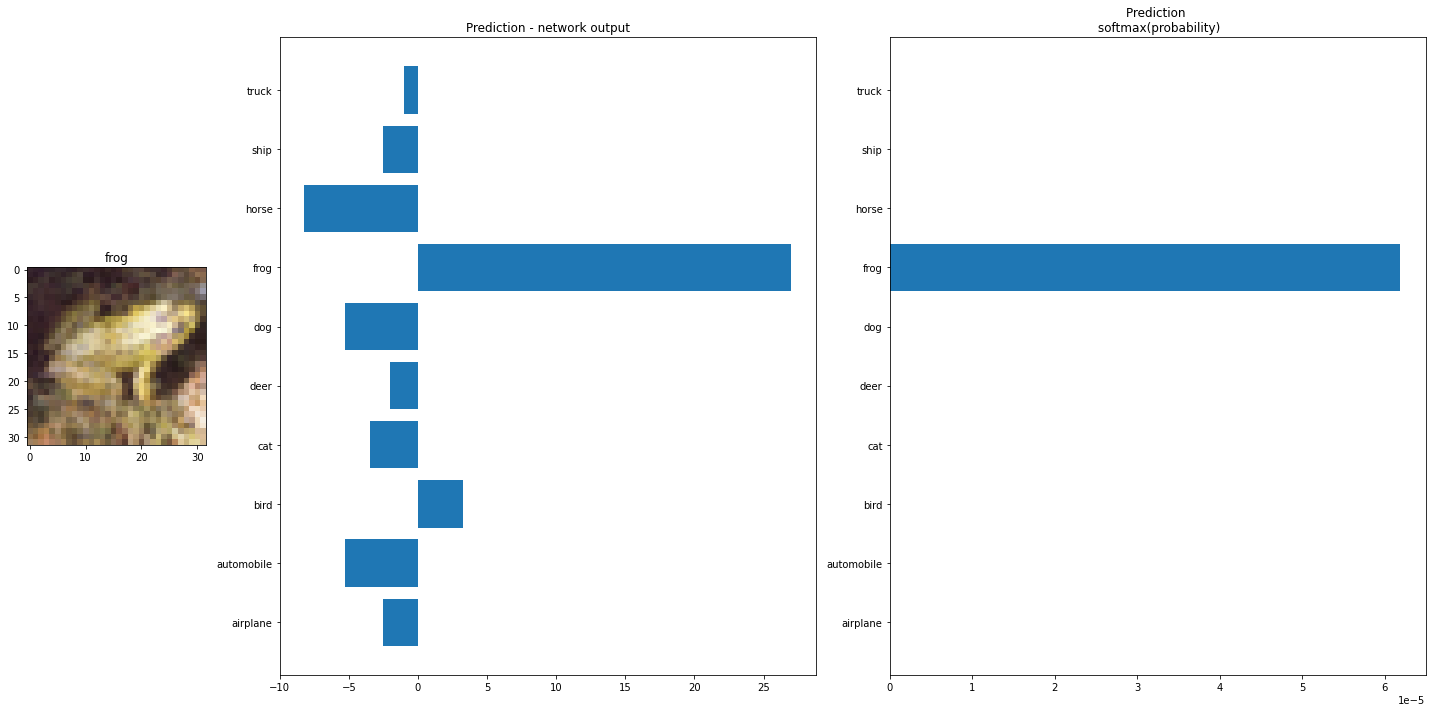

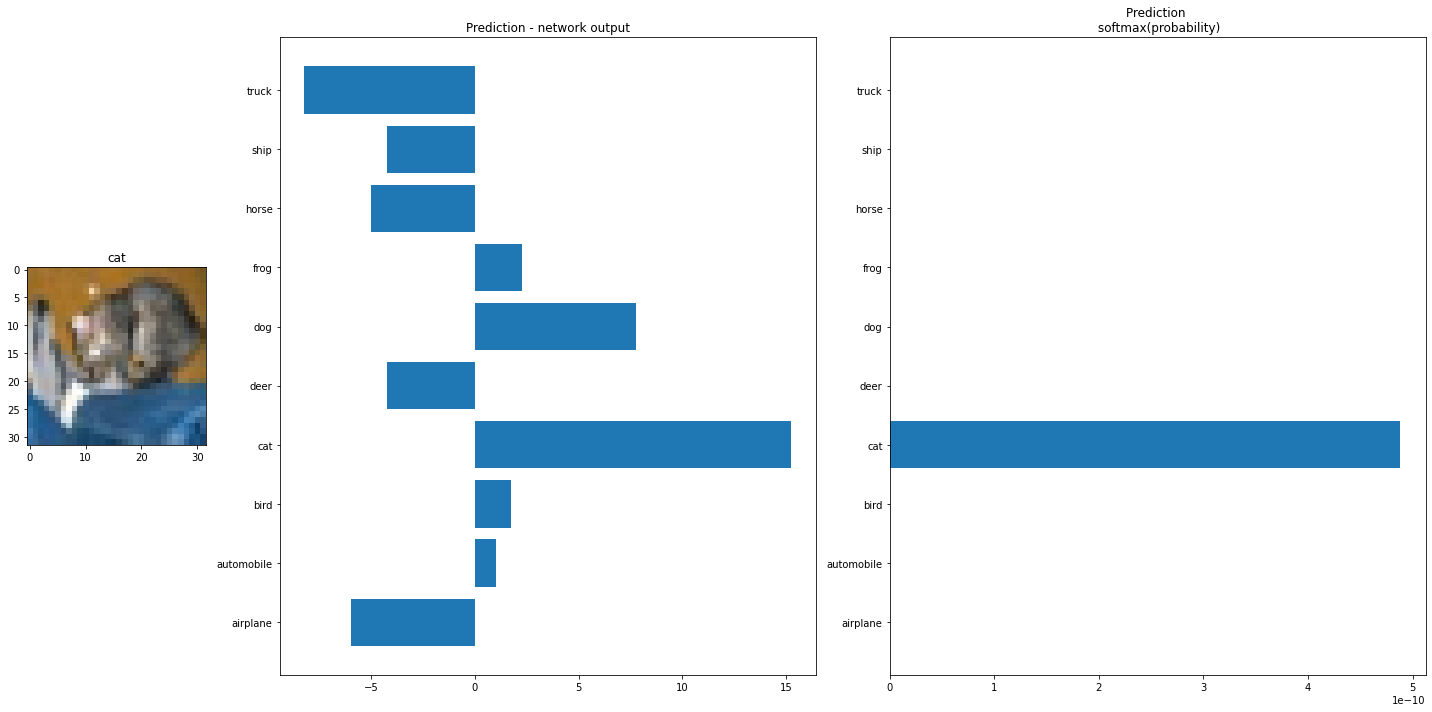

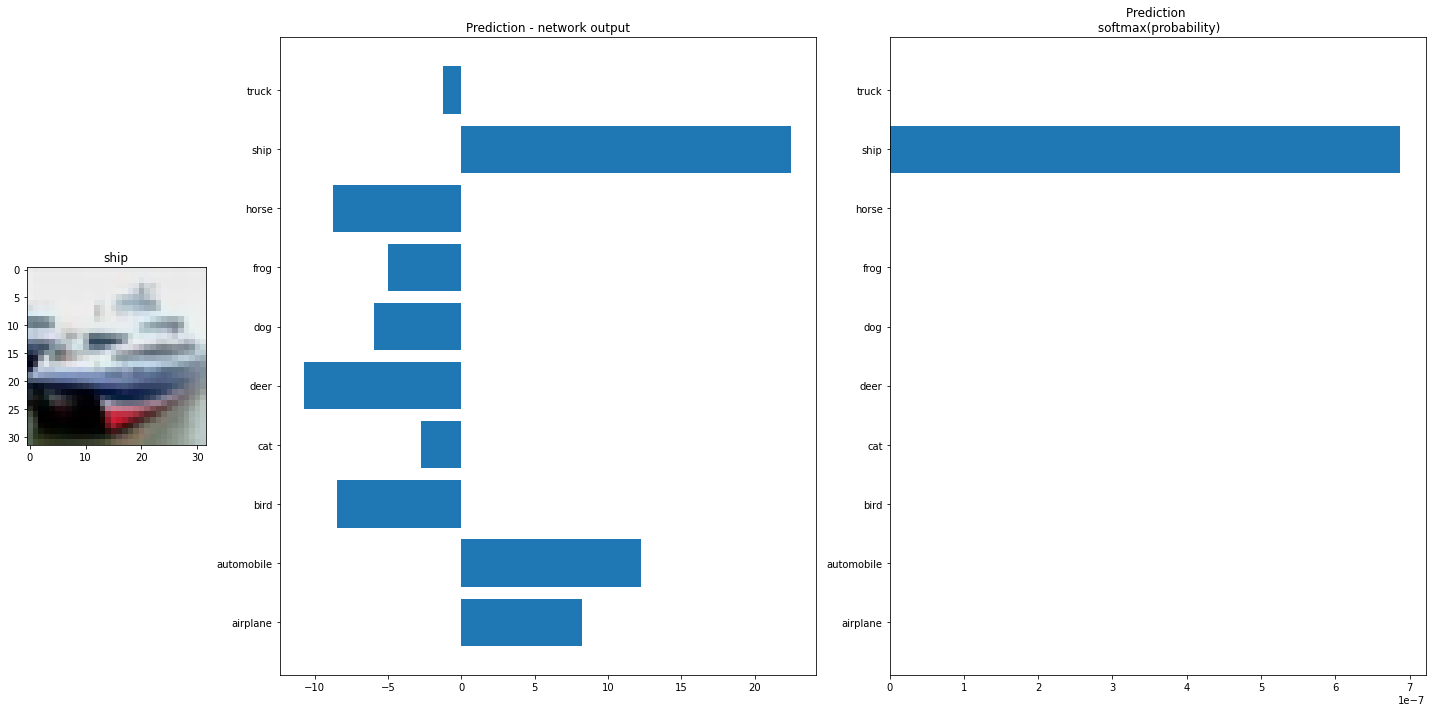

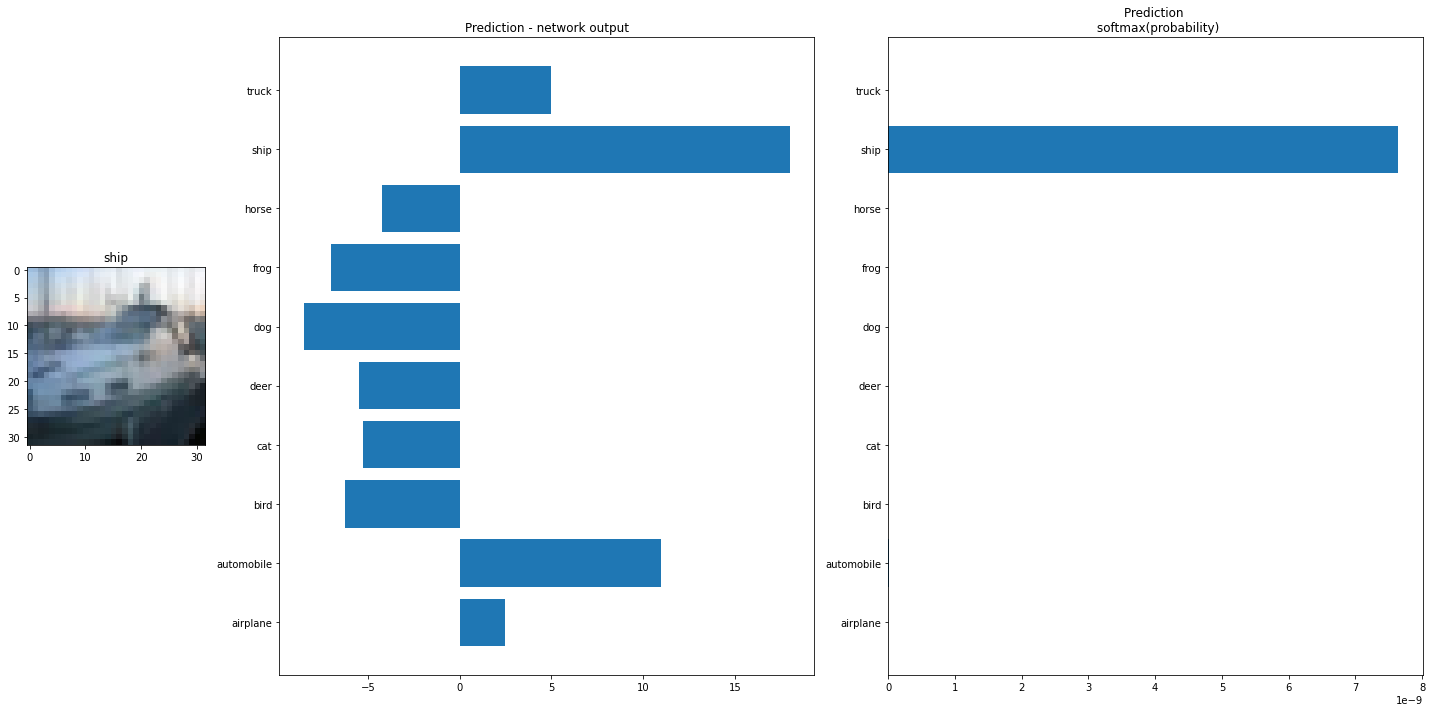

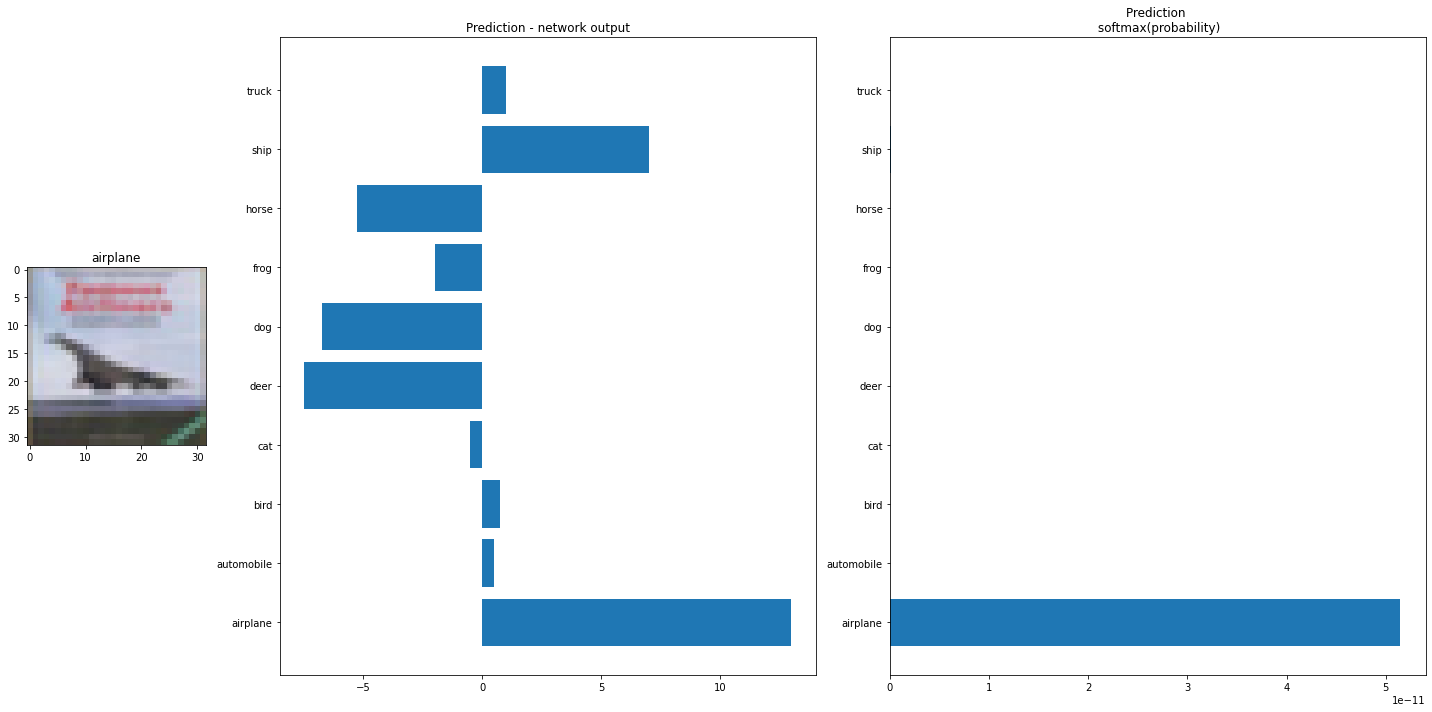

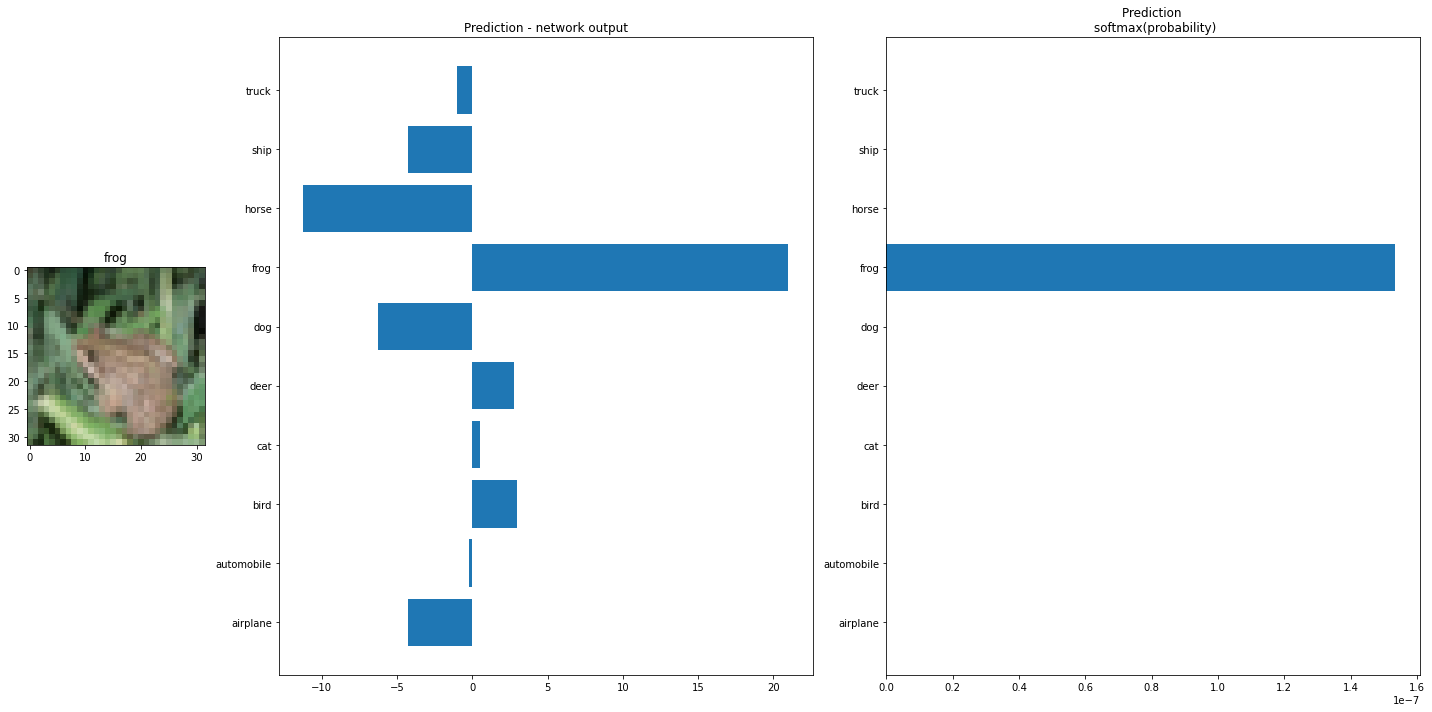

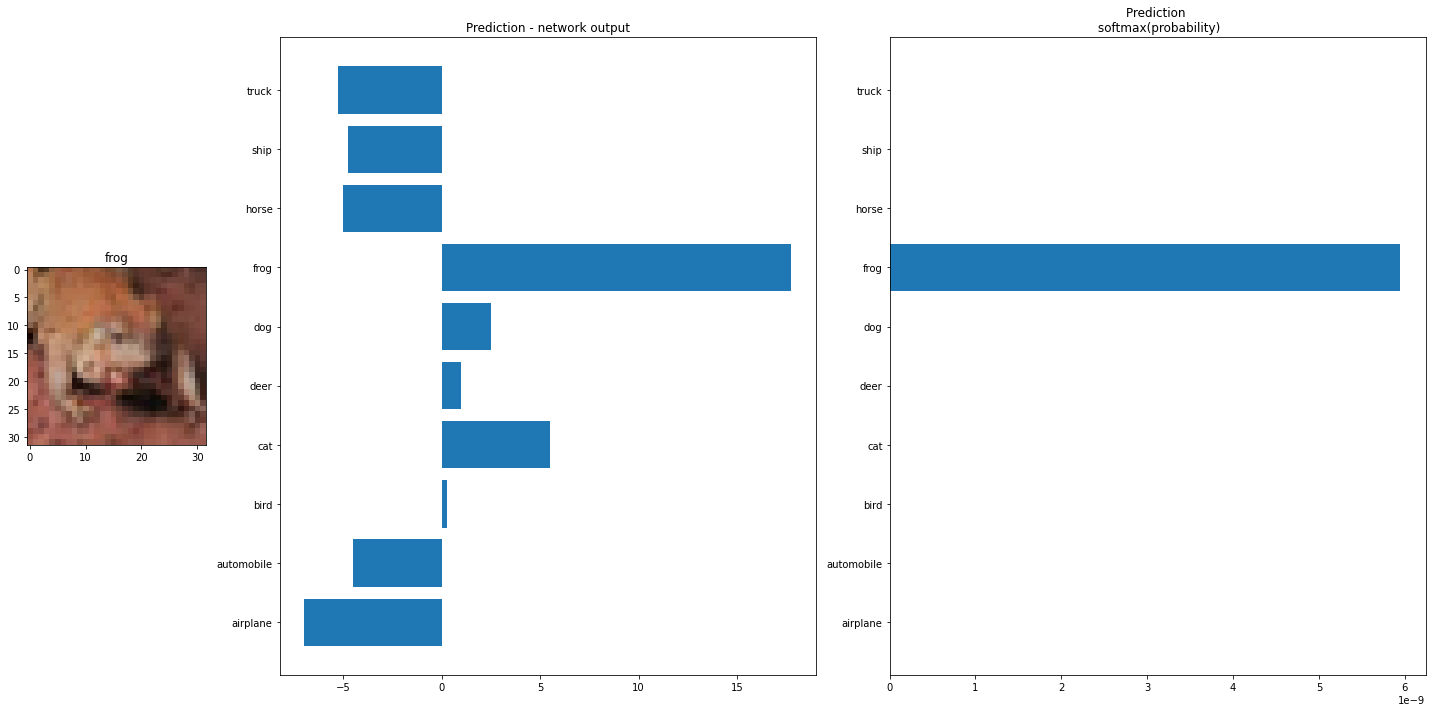

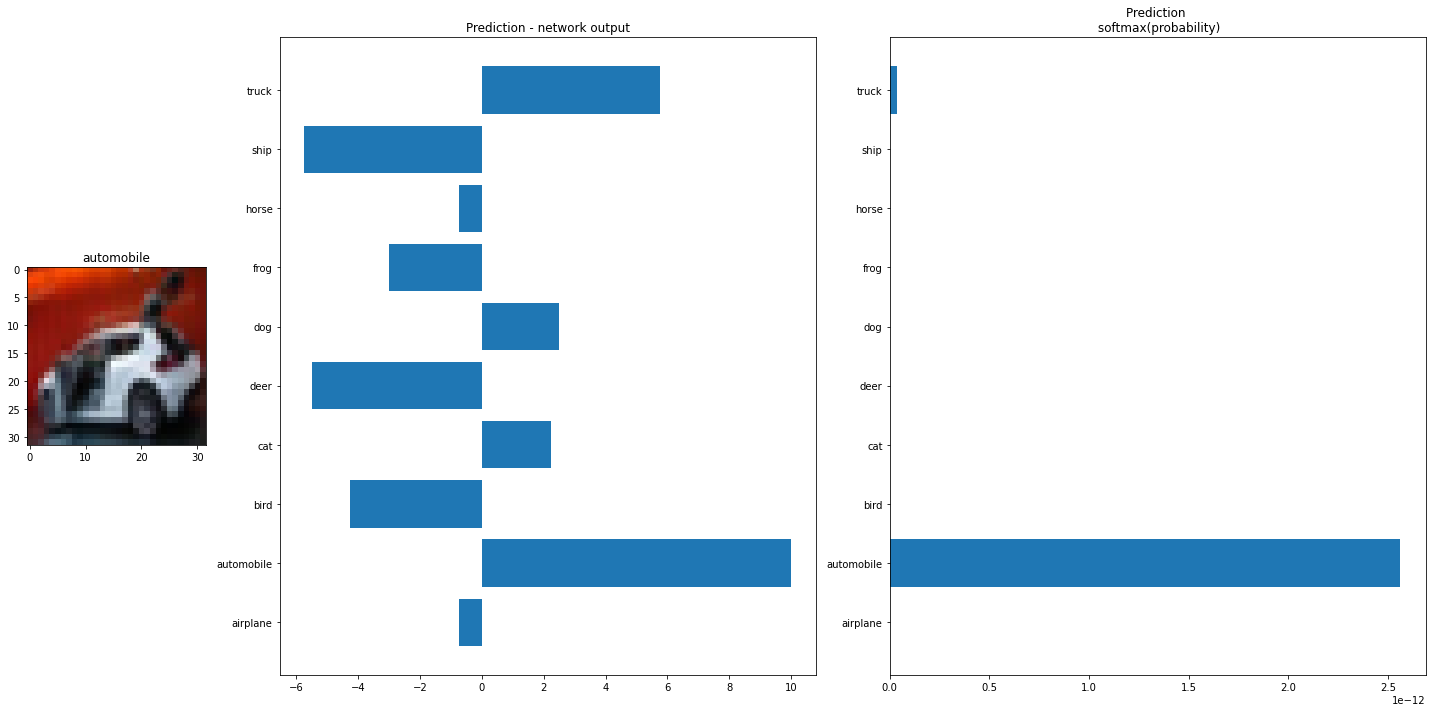

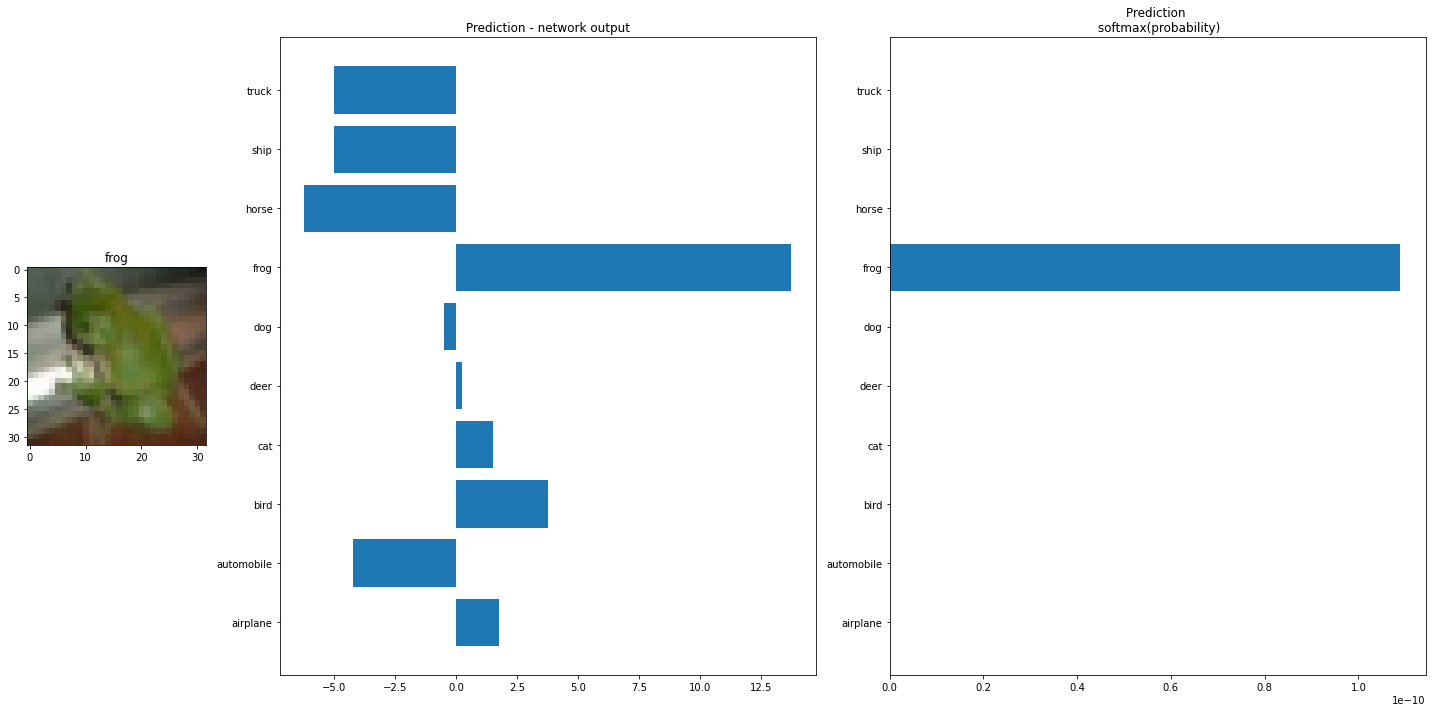

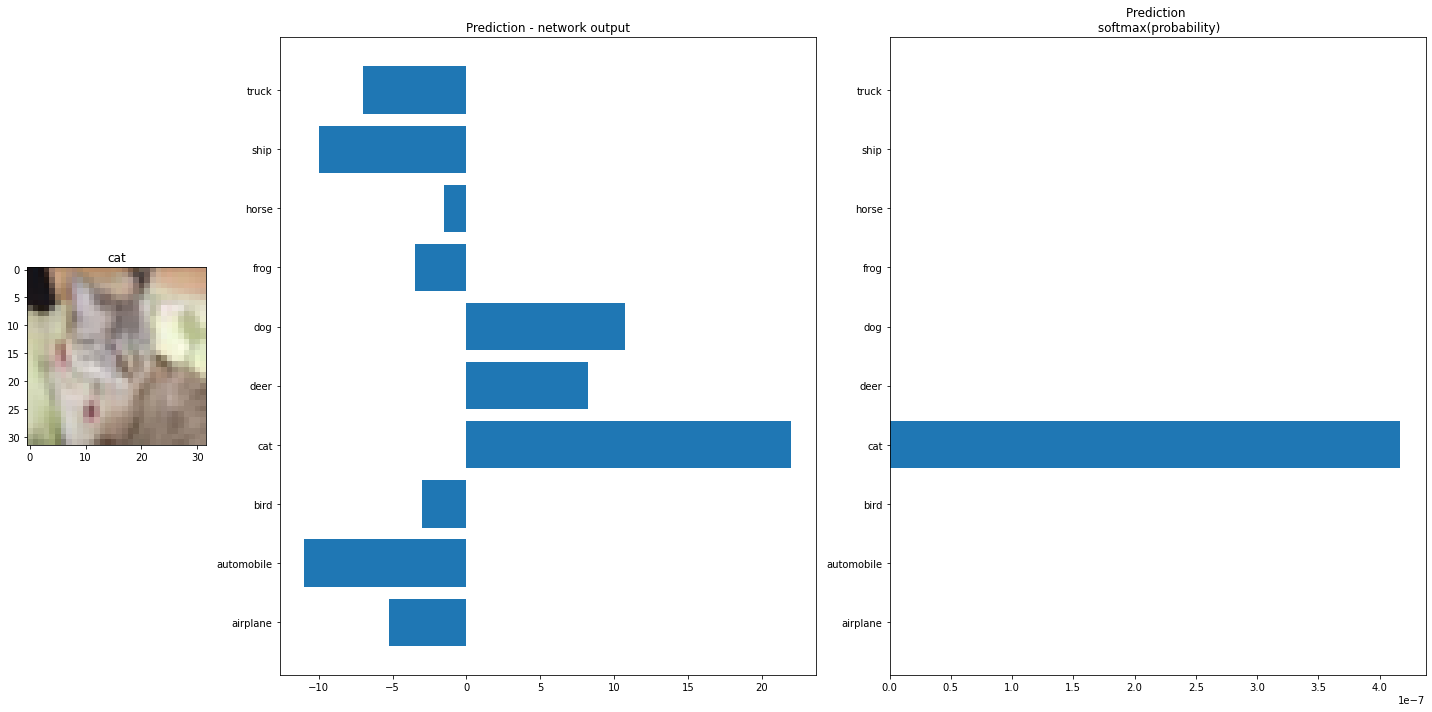

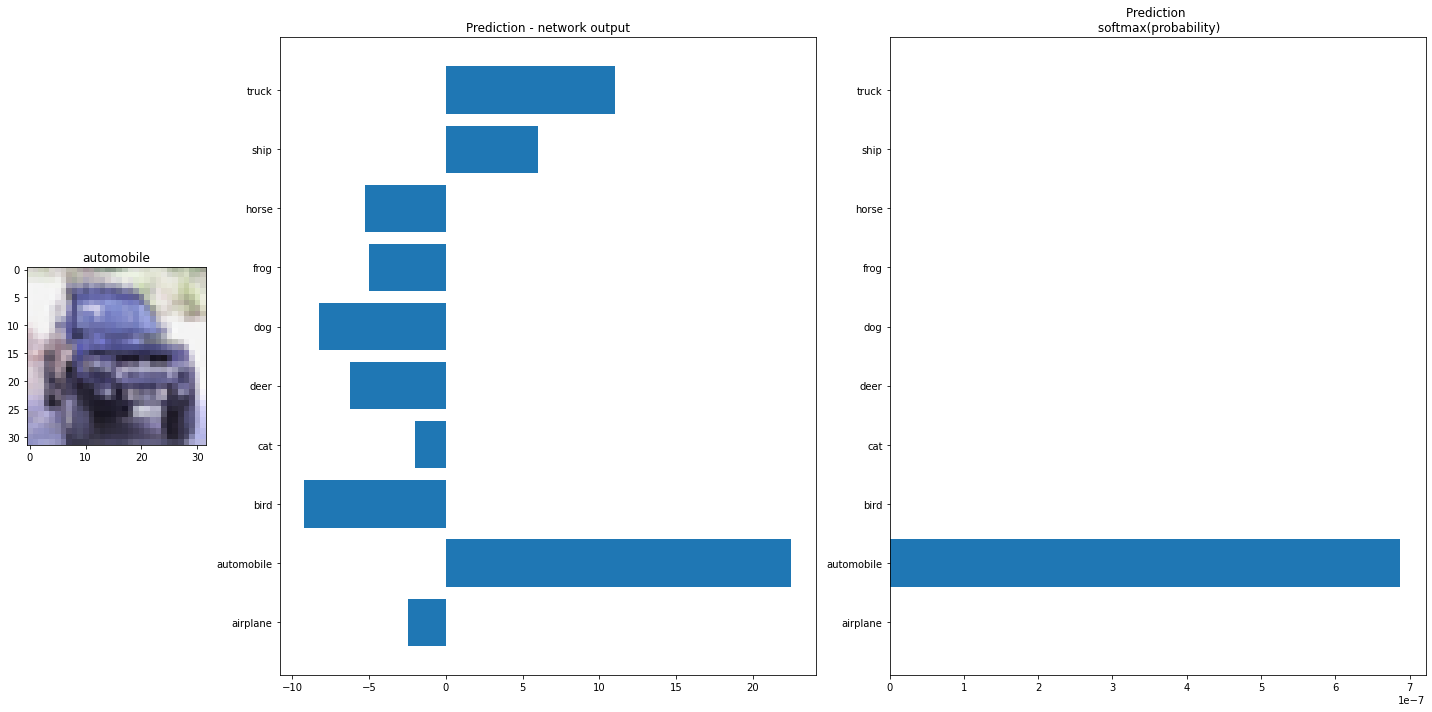

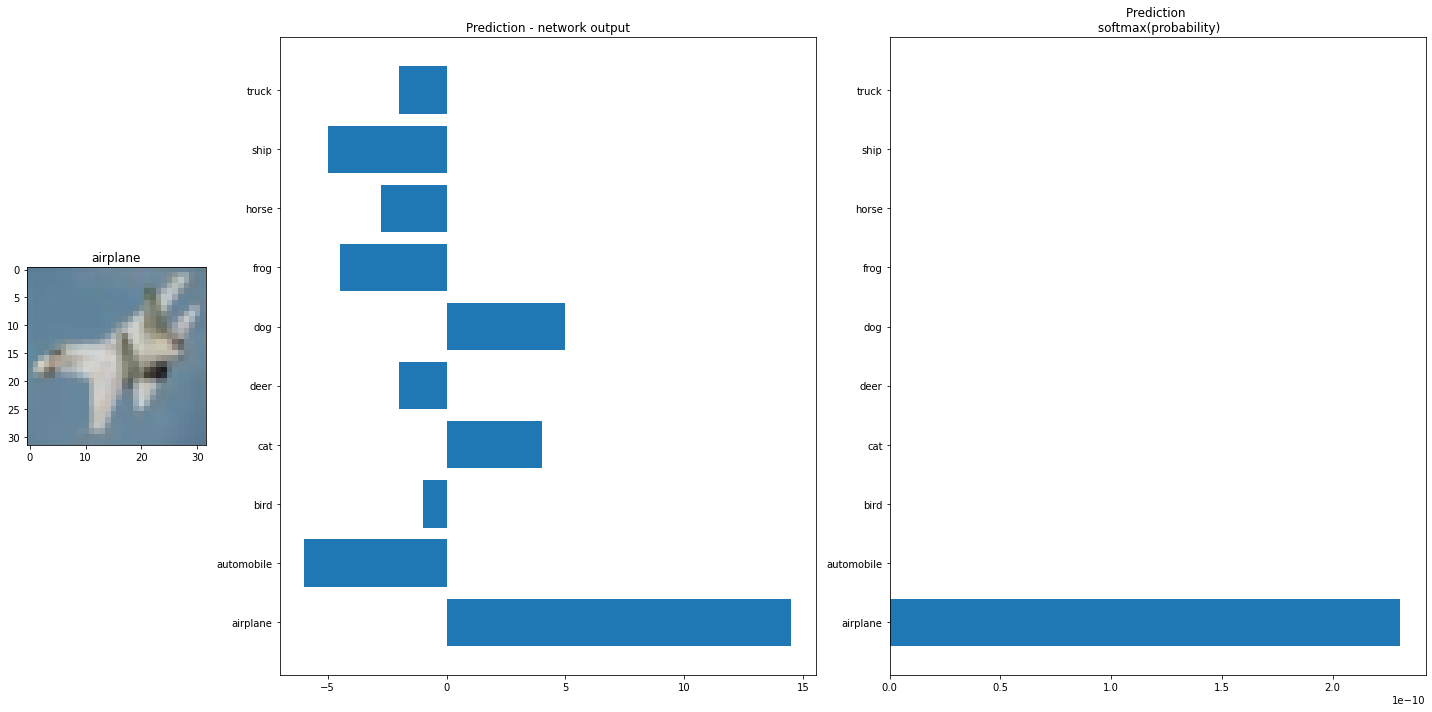

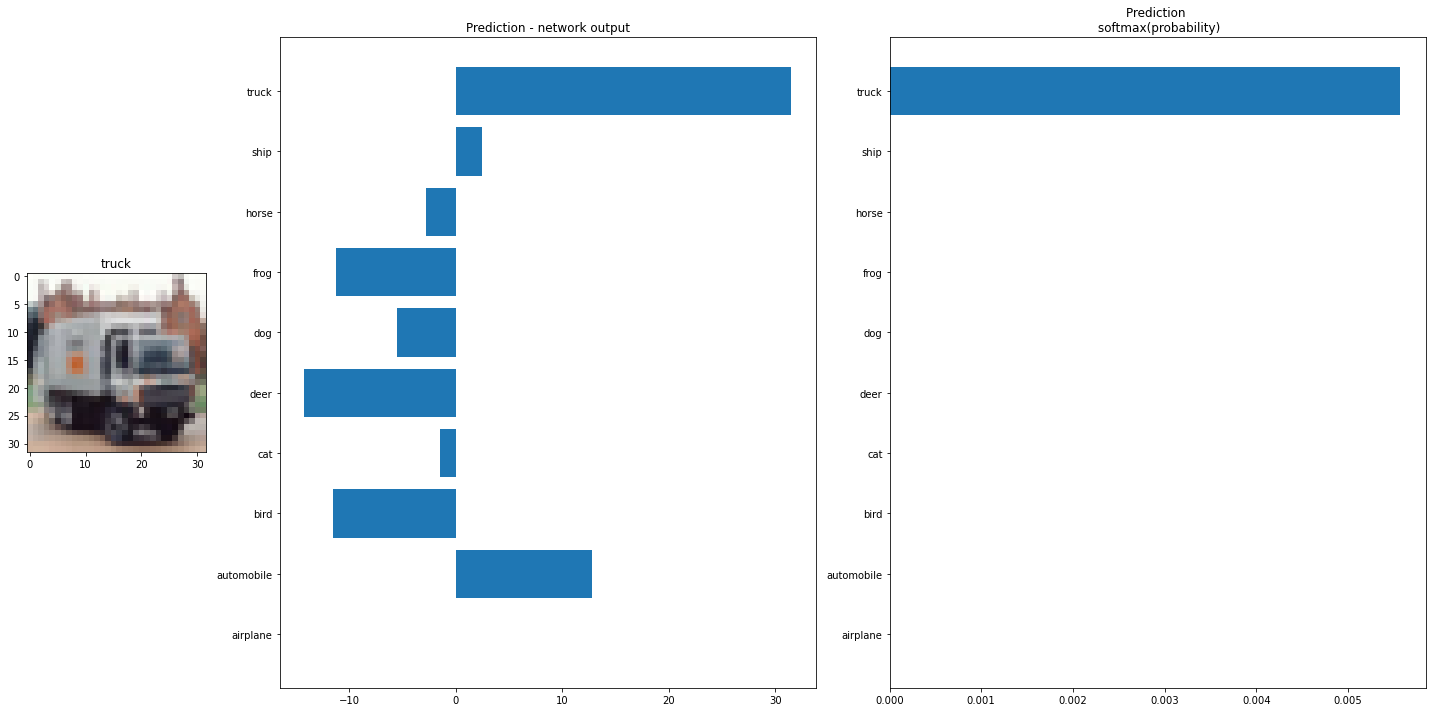

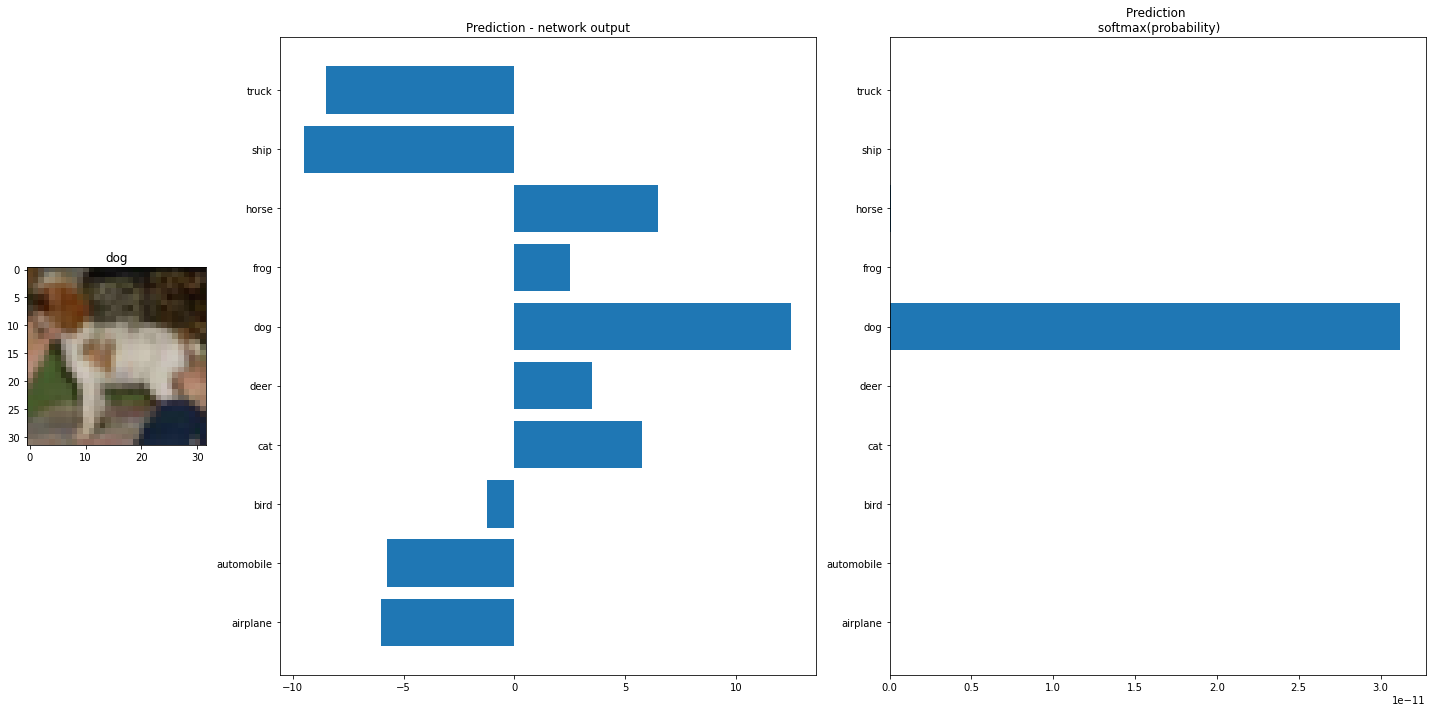

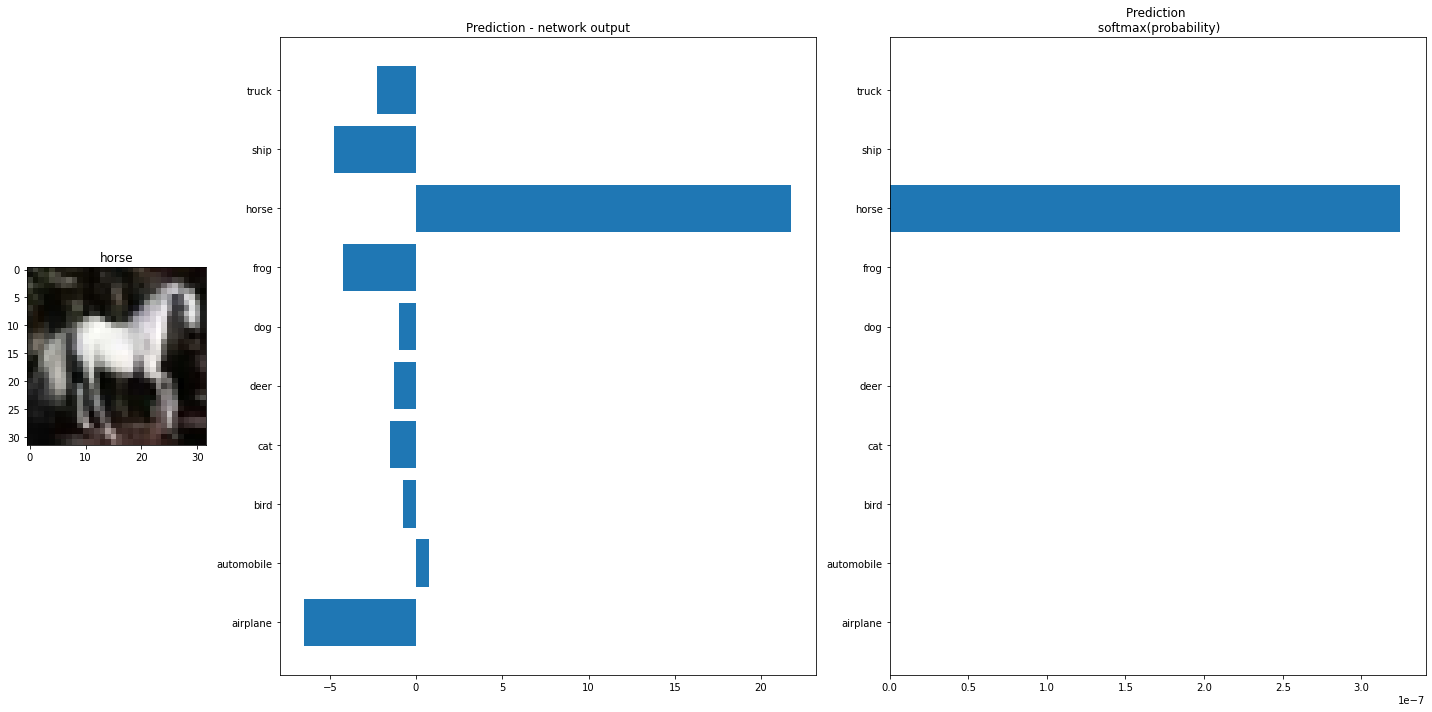

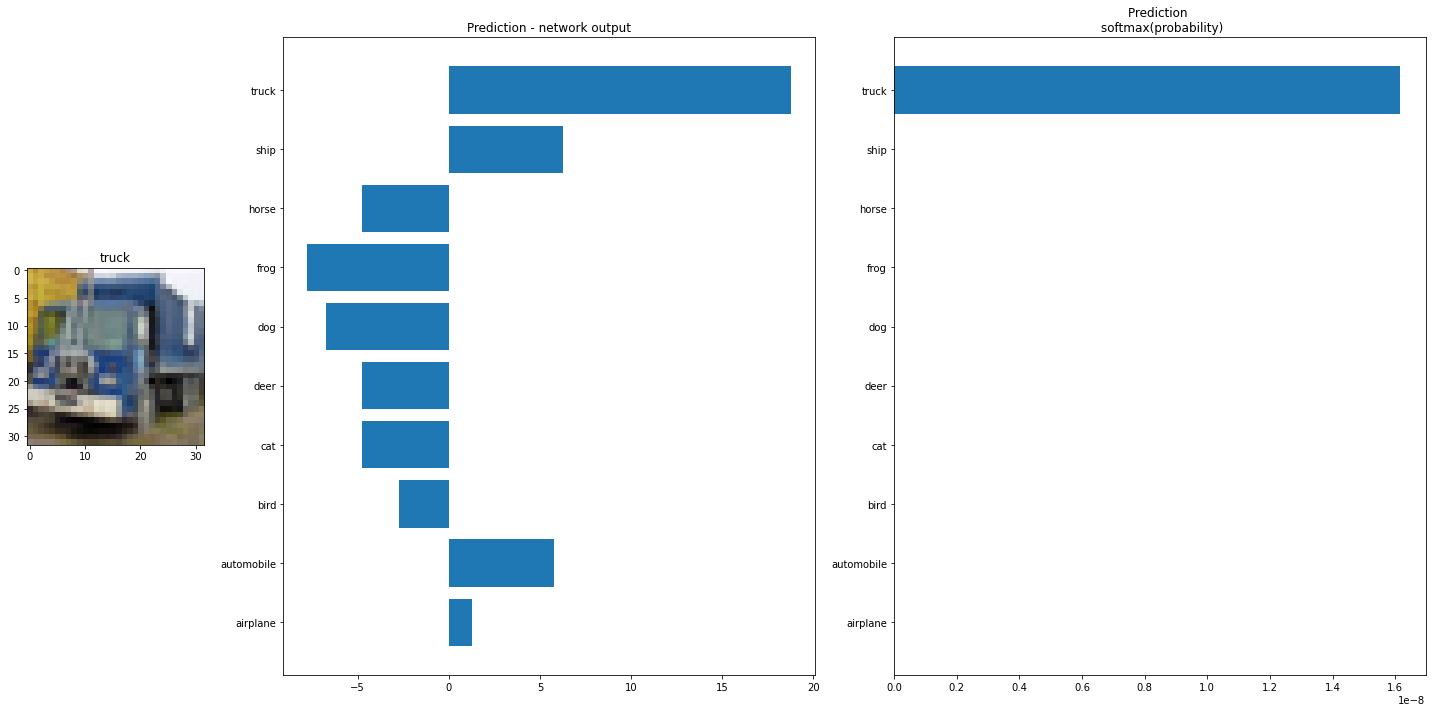

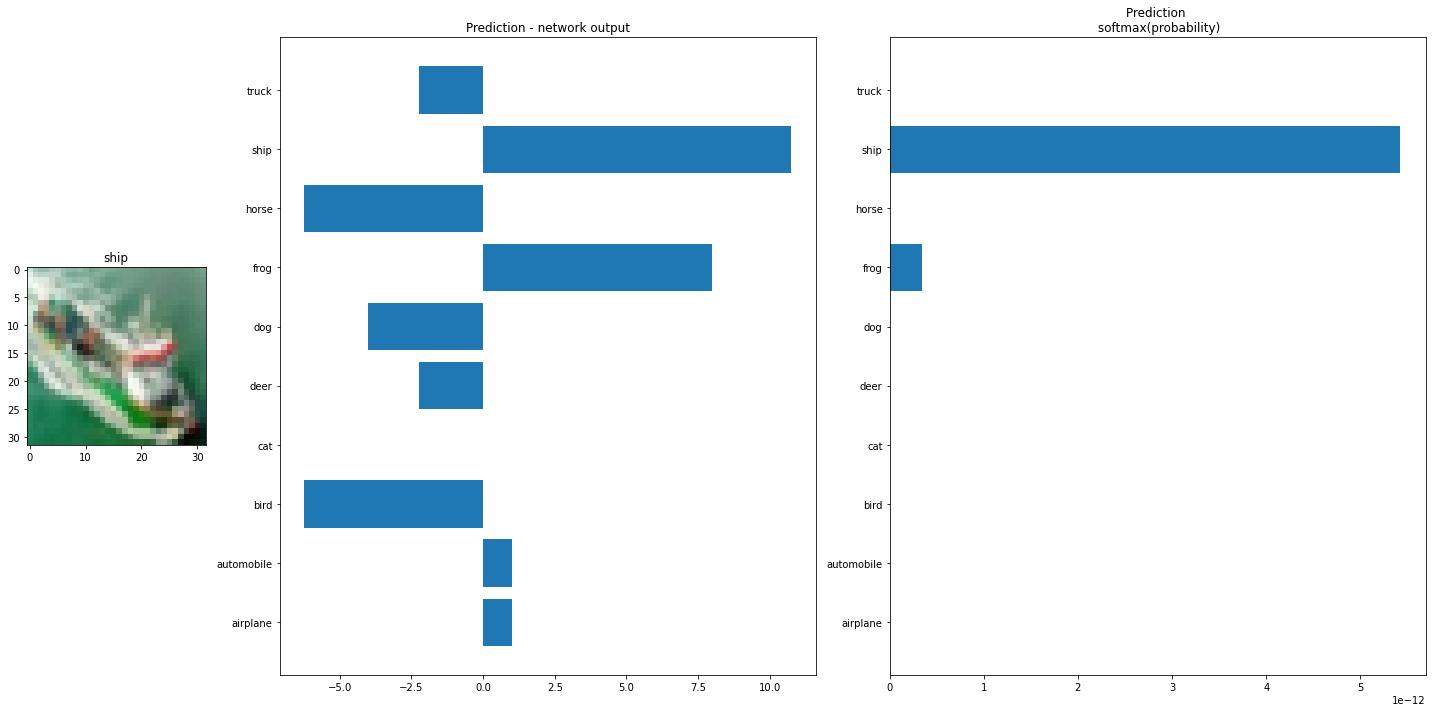

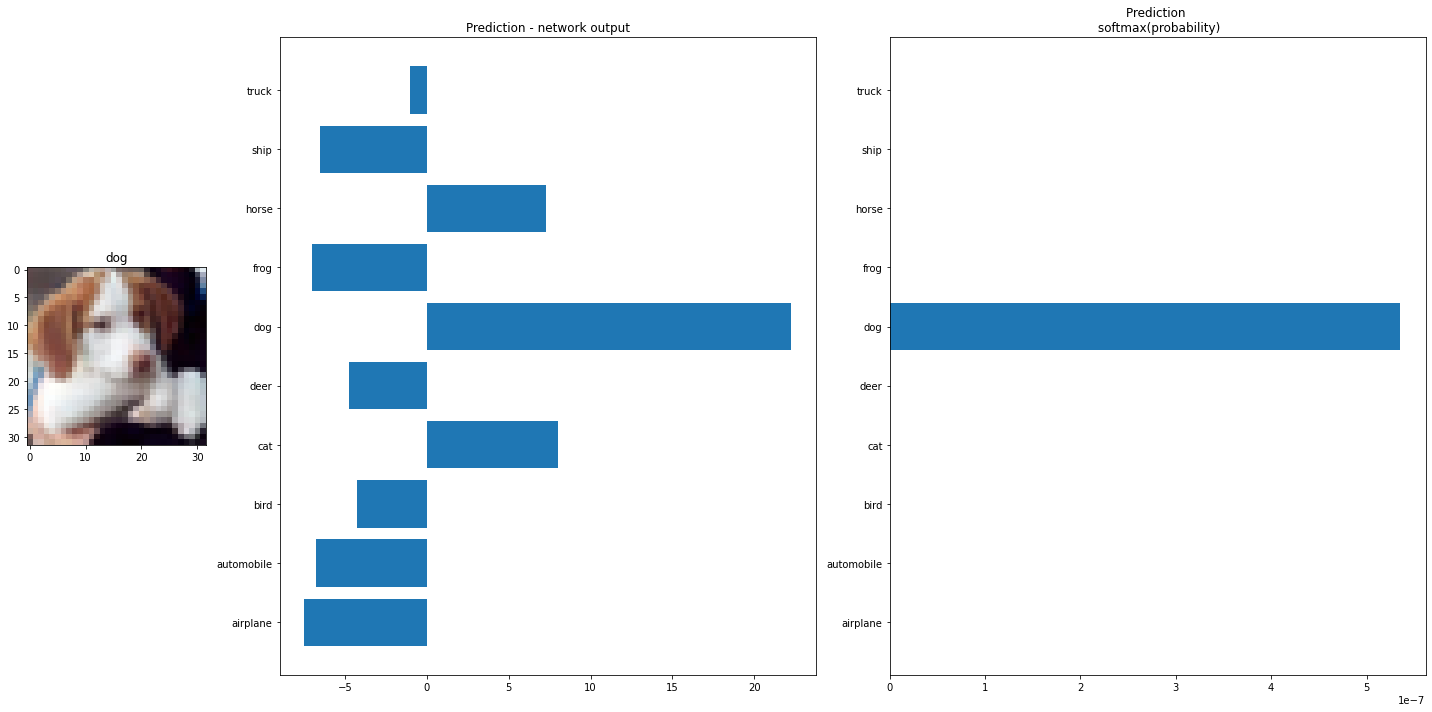

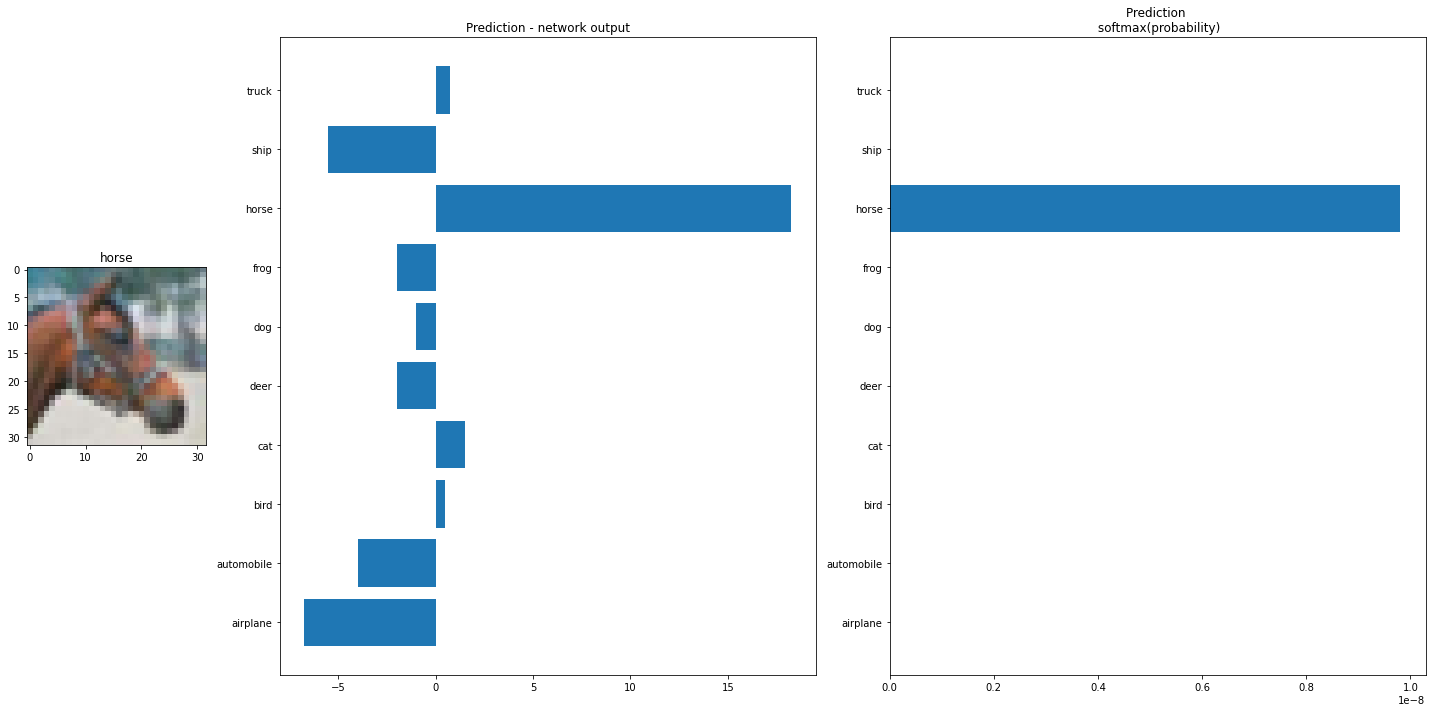

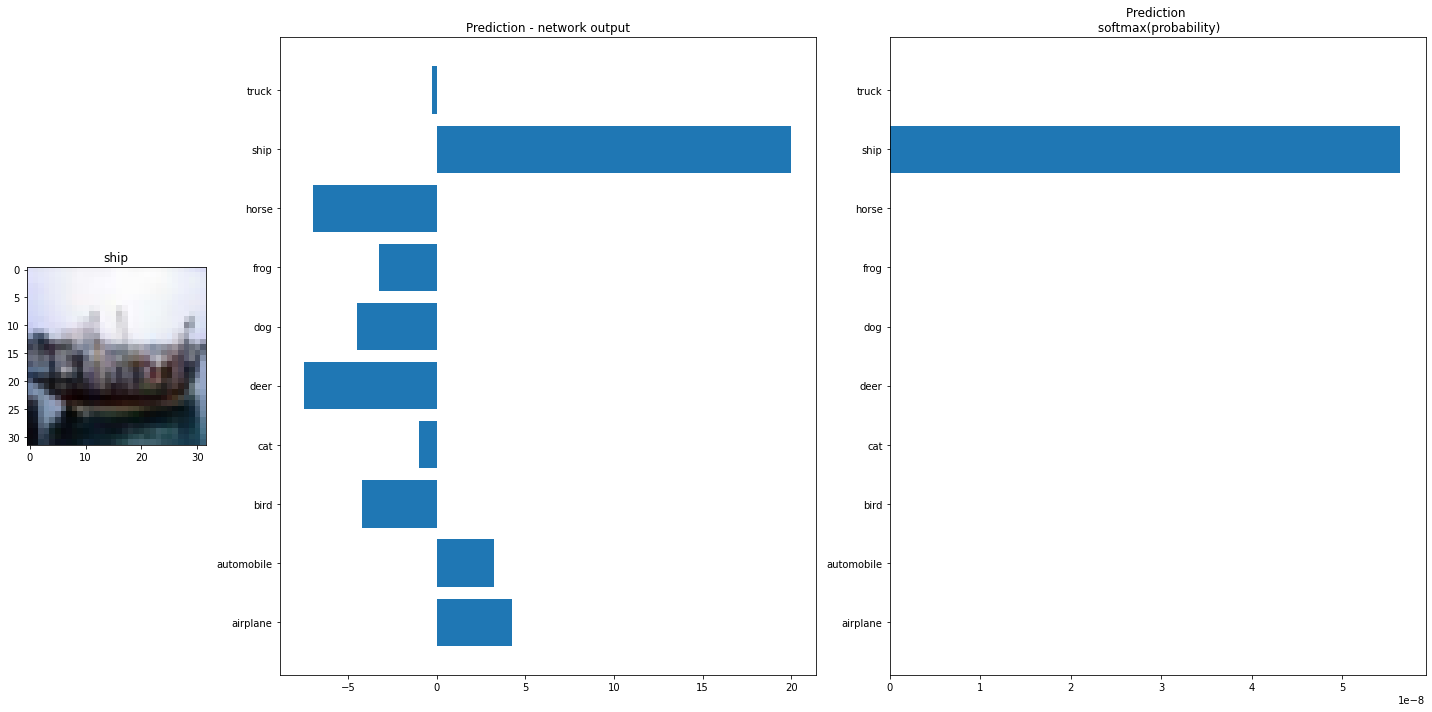

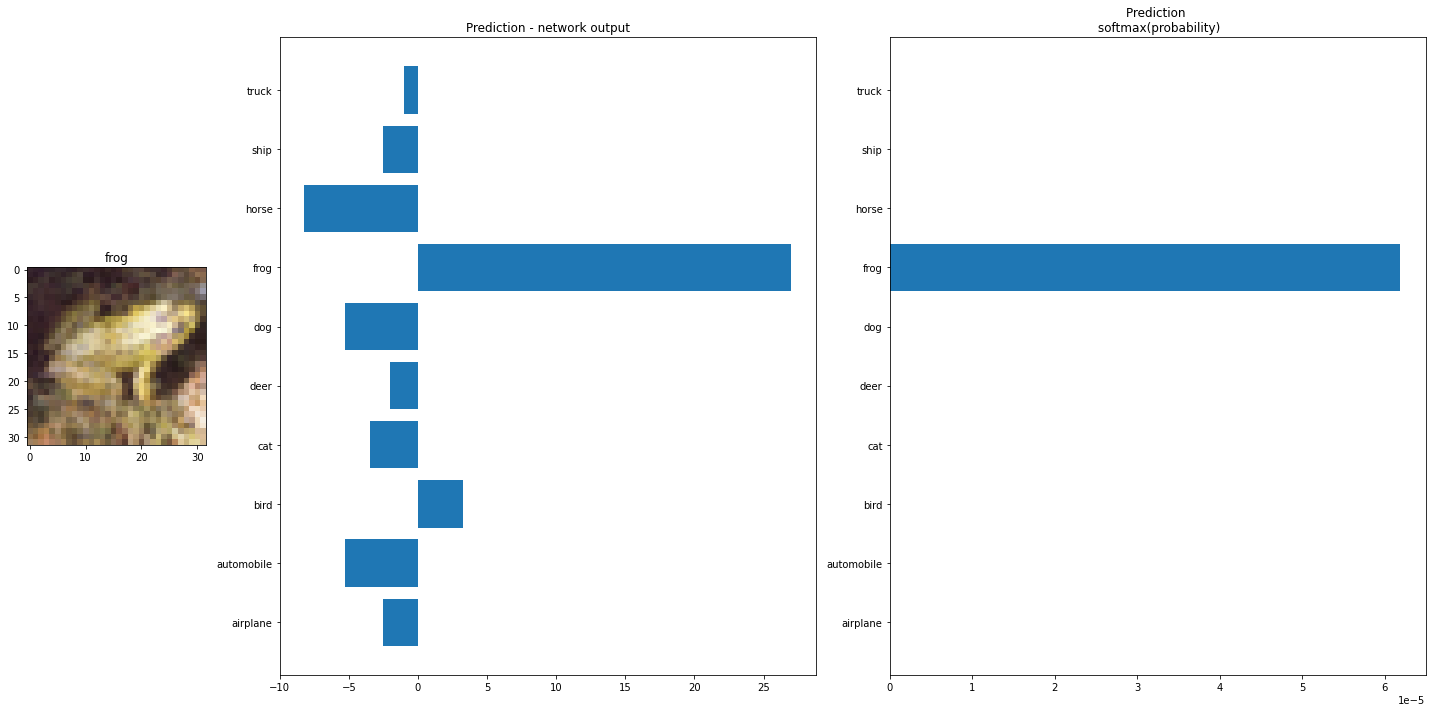

In [16]:
import pickle as pk
from scipy.special import softmax
import matplotlib.animation as animation
with open('inference_result_CifarResNet_int_u50.xmodel-thread1.pkl', 'rb') as f:
    res = pk.load(f)



def visualize_inference_result(imgs,m):
    import matplotlib.pyplot as plt
    import time
    from matplotlib import gridspec
    from IPython.display import clear_output, display
    
    X = imgs['data']
    Y = imgs['labels']
    label_names = load_label_names()
   
    softmax_m = softmax(np.array(res))
#     # show original image
    i = 0
    for i in range(20):
        clear_output(wait=True)
        fig = plt.figure(figsize=(20,10))
        fig.tight_layout()
        spec = gridspec.GridSpec(ncols=3, nrows=1,
                                     width_ratios=[1, 3, 3])
        ax1 = fig.add_subplot(spec[0])
        ax1.title.set_text(label_names[Y[i:i+1][0]])
        ax1.imshow(X[i:i+1][0])

        ax2 = fig.add_subplot(spec[1])
        ax2.title.set_text('Prediction - network output')
        ax2.barh(label_names, m[i], align='center')
        
        ax3 = fig.add_subplot(spec[2])
        ax3.title.set_text('Prediction \n softmax(probability)')
        ax3.barh(label_names, softmax_m[i], align='center')
        fig.tight_layout()
        display(fig)
        plt.savefig(f'inference_fig{i + 1}.jpg', facecolor=fig.get_facecolor(), edgecolor='none')
    
m = np.array(res)    
visualize_inference_result(imgs, m)